In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load the medical appointment no show data
file_path="noshowappointments.csv"
mans_df= pd.read_csv(file_path, index_col=0)
mans_df.head(10)

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,,,,,,,,,,,,,
2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No


In [3]:
#df = pd.DataFrame(mans_df)
mans_df.shape

(110527, 13)

In [4]:
#Find columns and their names
mans_df.columns

Index(['AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
#Find data types on each column
mans_df.dtypes

AppointmentID      int64
Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No-show           object
dtype: object

In [6]:
for column in mans_df.columns:
    print(f"Column {column} has {mans_df[column].isnull().sum()} null values")

Column AppointmentID has 0 null values
Column Gender has 0 null values
Column ScheduledDay has 0 null values
Column AppointmentDay has 0 null values
Column Age has 0 null values
Column Neighbourhood has 0 null values
Column Scholarship has 0 null values
Column Hipertension has 0 null values
Column Diabetes has 0 null values
Column Alcoholism has 0 null values
Column Handcap has 0 null values
Column SMS_received has 0 null values
Column No-show has 0 null values


In [7]:
# Creating new column with just the date
mans_df["ScheduledDay"] = pd.to_datetime(mans_df.ScheduledDay)
mans_df["AppointmentDay"] = pd.to_datetime(mans_df.AppointmentDay)


In [8]:
#Appointment days by day name 
#WeekDay= mans_df["AppointmentDay"].dt.day_name()
#Appointment days by day number
WeekDay=mans_df["AppointmentDay"].dt.weekday
mans_df["WeekDay"]=WeekDay
mans_df

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WeekDay
PatientId,,,,,,,,,,,,,,
2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4
5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4
4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,4
8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4
8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,1
3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,1
1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,1


In [9]:
time_delta=mans_df.AppointmentDay.dt.dayofyear-mans_df.ScheduledDay.dt.dayofyear
time_delta

PatientId
2.987250e+13     0
5.589978e+14     0
4.262962e+12     0
8.679512e+11     0
8.841186e+12     0
                ..
2.572134e+12    35
3.596266e+12    35
1.557663e+13    41
9.213493e+13    41
3.775115e+14    41
Length: 110527, dtype: int64

In [10]:
mans_df["TimeDelta"]=time_delta
mans_df["ScheduledDay"] = mans_df["ScheduledDay"].dt.date
mans_df["AppointmentDay"] = mans_df["AppointmentDay"].dt.date
mans_df.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WeekDay,TimeDelta
PatientId,,,,,,,,,,,,,,,
2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,0
5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,0
4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,0
8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,0
8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,0


In [11]:
mans_df.dtypes

AppointmentID      int64
Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No-show           object
WeekDay            int64
TimeDelta          int64
dtype: object

In [12]:
# Replacing No-show by show, Yes by 0, and No by 1
mans_df.rename(columns={'No-show': 'Show'}, inplace=True)
mans_df.loc[mans_df['Show'] == 'Yes', ['Show']] = 0
mans_df.loc[mans_df['Show'] == 'No', ['Show']] = 1

In [13]:
# Drop the record of Age < 0.
mans_df.drop(index=mans_df[mans_df['Age'] < 0].index[0], inplace=True)

In [14]:
Neighbourhood=mans_df.Neighbourhood.value_counts()
Neighbourhood

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

## Visualize

#### Gender Vs No-show

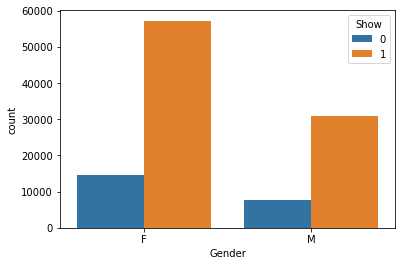

In [15]:
sns.countplot(x='Gender', hue='Show', data=mans_df)
plt.show()

#### Neighbourhood  No-show Appoiments

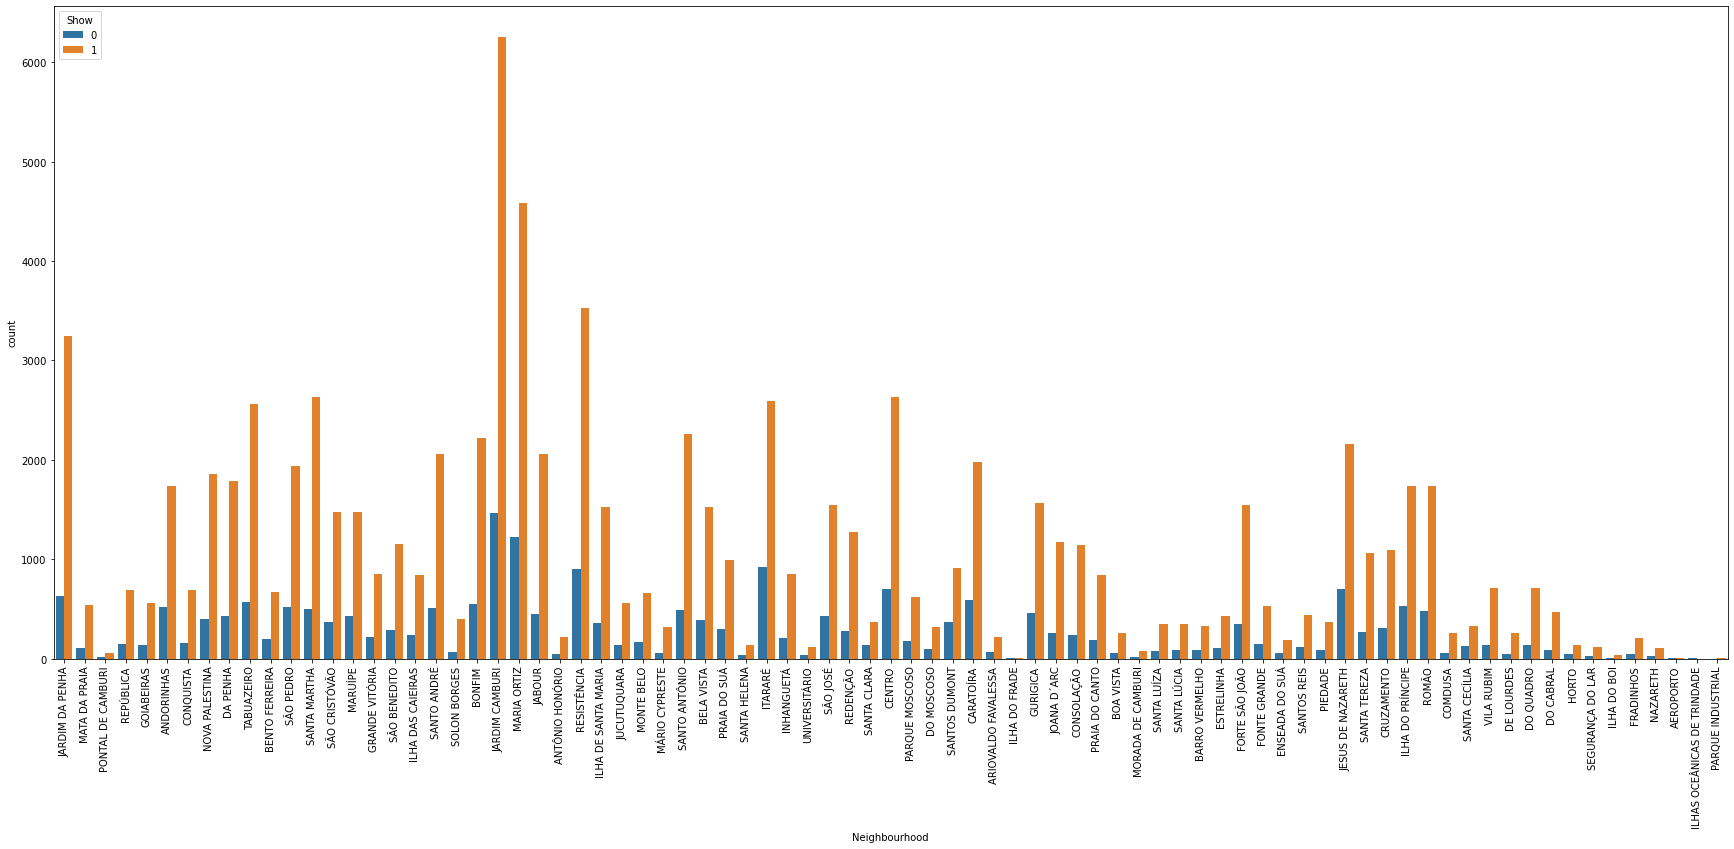

In [16]:
plt.figure(figsize=(30,12))
fig = sns.countplot(x='Neighbourhood',hue='Show',data=mans_df)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90);


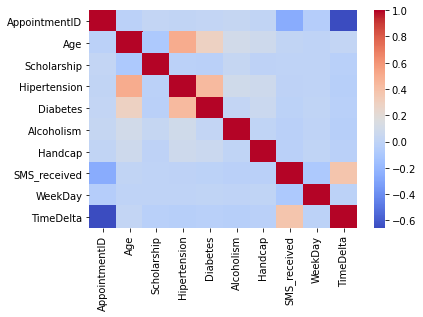

In [17]:
sns.heatmap(mans_df.corr(), cmap='coolwarm')
plt.show()

### Which gender is commited more to their appointment, Male or Female?


#### Hot encoding the Show column > Which means we should drop the rest columns for avoiding misconvinention,  and focusing only on the columns that we're going to use.

In [18]:
show_encoded = pd.get_dummies(mans_df.drop(columns=['AppointmentID', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
                                                     'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'ScheduledDay', 'AppointmentDay', 'WeekDay', 'TimeDelta']), 
                              columns=['Show'])

In [19]:
show_encoded

,Gender,Show_0,Show_1
PatientId,,,
2.987250e+13,F,0,1
5.589978e+14,M,0,1
4.262962e+12,F,0,1
8.679512e+11,F,0,1
8.841186e+12,F,0,1
...,...,...,...
2.572134e+12,F,0,1
3.596266e+12,F,0,1
1.557663e+13,F,0,1


In [20]:
show_encoded.groupby('Gender').sum()

,Show_0,Show_1
Gender,,
F,14594.0,57245.0
M,7725.0,30962.0


### Perfect. Let's move on and transpose the dataframe for somoother dealing.

In [21]:
show_encoded.groupby('Gender').sum().T

Gender,F,M
Show_0,14594.0,7725.0
Show_1,57245.0,30962.0


####  Creating 2 pandas series for each Male and Female, and sorting the values as well.

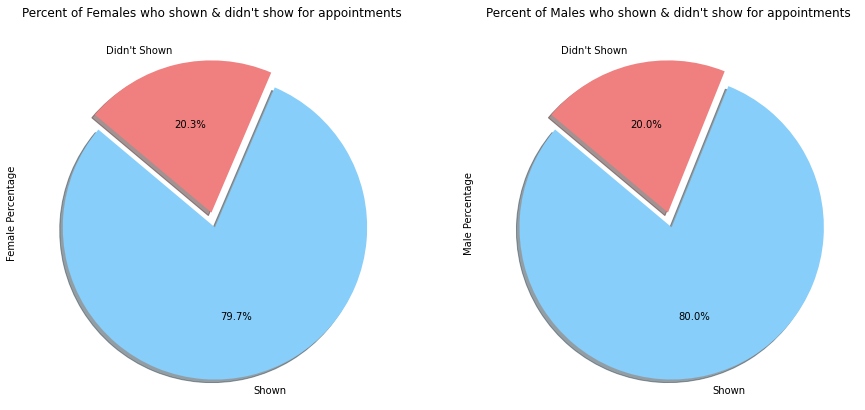

In [22]:
show_percent_f = show_encoded.groupby('Gender').sum().T['F'].sort_values(ascending=False)
show_percent_m = show_encoded.groupby('Gender').sum().T['M'].sort_values(ascending=False)

sizes_f = list(show_percent_f)
sizes_m = list(show_percent_m)

# Changing the labels of the chart
labels = ['Shown', "Didn't Shown"]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

f = plt.figure(figsize=(15, 7))

ax1 = f.add_subplot(1, 2, 1)
ax2 = f.add_subplot(1, 2, 2)

ax1.pie(sizes_f, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax1.set_title("Percent of Females who shown & didn't show for appointments");
ax1.set_ylabel("Female Percentage")


ax2.pie(sizes_m, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax2.set_title("Percent of Males who shown & didn't show for appointments")
ax2.set_ylabel("Male Percentage");


### Does having a scholarship explains the problem of not showing up? 

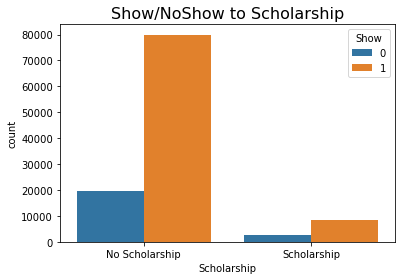

In [26]:
# printing Number of showing up vs not showing up in case of having a scholarship or not

ax = sns.countplot(x=mans_df.Scholarship, hue=mans_df.Show, data=mans_df)
ax.set_title("Show/NoShow to Scholarship", size='16')
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()